In [1]:
%matplotlib inline


from matplotlib import colors, cm
from matplotlib.colors import LogNorm

import matplotlib.pyplot as plt
import numpy as np

In [5]:
import scalar_metrics
reload(scalar_metrics)
from scalar_metrics import LoadMetrics

In [6]:
cam, exp, night = 'b0', '00000003', '20190101'
print "\n\nTests for the available scalars and using yaml output\n", "="*50
print "TO DO:\n *docs of functions \n *what more else?"
lm = LoadMetrics(cam, exp, night)
print lm.keys_from_scalars('getbias','warn')
print lm.Test_ranges('getbias', 'warn')
print lm.qa_status('countpix')





Tests for the available scalars and using yaml output
TO DO:
 *docs of functions 
 *what more else?


TypeError: exceptions must be old-style classes or derived from BaseException, not str

In [7]:

metrics, tests  = lm.Load_metrics_n_tests('snr')

/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-countpix-b0-00000003.yaml
countpix loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-getbias-b0-00000003.yaml
getbias loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-getrms-b0-00000003.yaml
getrms loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-xwsigma-b0-00000003.yaml
xwsigma loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-countbins-b0-00000003.yaml
countbins loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-integ-b0-00000003.yaml
integ loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-skycont-b0-00000003.yaml
skycont loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-skypeak-b0-00000003.yaml
skypeak loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-skyresid-b0-00000003.yaml
skyresid loaded
/home/felipe/quicklook/spe

In [23]:
#AUXILIARY
countpix  = metrics['countpix']
getbias   = metrics['countpix']
getrms    = metrics['getrms']
xwsigma   = metrics['xwsigma']
countbins = metrics['countbins']
integ     = metrics['integ']
skycont   = metrics['skycont']
skypeak   = metrics['skypeak']
skyresid  = metrics['skyresid']
snr       = metrics['snr']

### Dictionary

In [11]:
def explorer(name):
    print '* {} *'.format(name)
    x = metrics[name]
    for i in x.viewkeys():
        try:
            print 'List : {} {}'.format( i, len(x[i]))
            #if len(x[i]) == 2:
            #    print '  \t\t {} {} '.format(len(x[i])[0], len(x[i])[1])
        except:
            print 'float: {} {}'.format( i,  x[i])

steps_dic_from_file = {'preproc':['countpix', 'getbias','getrms','xwsigma'],
              'extract':['countbins'],
              'fiberfl':['integ', 'skycont', 'skypeak', 'skyresid'],
              'skysubs':['snr']}
steps_list = ['preproc', 'extract', 'fiberfl', 'skysubs']

def explorer_test(name):
    print '\ntests',name
    x = tests[name]
    for i in x.viewkeys():
        try:
            print 'List : {} {}'.format( i, len(x[i]))
            #if len(x[i]) == 2:
            #    print '  \t\t {} {} '.format(len(x[i])[0], len(x[i])[1])
        except:
            print 'float: {} {}'.format( i,  x[i])
    print '---'*8, '\n' 


In [12]:
for j in list(steps_dic_from_file.viewkeys()):
    print '** {} **'.format(j) 
    for i in steps_dic_from_file[j]:
        explorer(i)
        explorer_test(i)
    print '===='*8,'\n'

** preproc **
* countpix *
List : NPIX_LOW_AMP 4
List : NPIX_HIGH_AMP 4
List : NPIX_ERR 5
float: NPIX_LOW 72877
float: NPIX_HIGH 20249

tests countpix
List : NPIX_ALARM_RANGE 2
float: CUTHI 10
List : NPIX_WARN_RANGE 2
float: CUTLO 3
------------------------ 

* getbias *
float: DATA5SIG 2
List : BIASDIFF_ERR 6
List : BIAS_AMP 4
float: DIFF1SIG 0.082
float: BIAS 0.164244522865
float: DIFF3SIG 0.091
float: DIFF2SIG 0.088
List : MEANBIAS_ROW 4096

tests getbias
List : DIFF_ALARM_RANGE 2
List : PERCENTILES 3
List : DIFF_WARN_RANGE 2
------------------------ 

* getrms *
List : RMS_OVER_AMP 4
float: RMS 2.23254110261
float: RMS_OVER 2.783457319
List : EXPNUM_WARN 0
List : RMSDIFF_ERR 5
List : RMS_ROW 8192
List : RMS_AMP 4

tests getrms
List : RMS_ALARM_RANGE 2
List : RMS_WARN_RANGE 2
------------------------ 

* xwsigma *
List : XSHIFT_FIB 0
List : XSHIFT_AMP 1
List : WSHIFT_AMP 1
List : SHIFT_ERR 6
float: XSHIFT 0.0
float: XSIGMA_MED 1.11715661962
float: XSIGMA_MED_SKY 1.11715661962
List :

<a id="main"></a>



### QA Steps

[Step 1 (countpix, getbias, getrms,  xwsigma)]( #step1)

[Step 2 (countbins)](#step2)

[Step 3 (integ, skycount, skypeak, skyresid)](#step3)

[Step 4 (snr)](#step4)

###  =================

<a id="step1"  style="color:red">Step 1: PRE PROCESSING</a> 

[(Back to Main)](#main)    [Next =>](#step2)

#### 1.1) CountPix

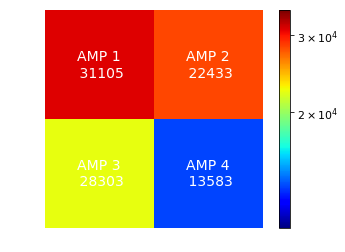

In [28]:
#preproc

grid =np.array([[0,1],[0,1]])
fig, ax = plt.subplots()

to_plot = np.array(countpix['NPIX_LOW_AMP']).reshape(2,2)
vmin, vmax = np.min(countpix['NPIX_LOW_AMP']), np.max(countpix['NPIX_LOW_AMP'])
if vmin != 0: vmin= 0.8*vmin
if vmax != 0: vmax = 1.1*vmax
im         = ax.imshow(to_plot, cmap=cm.jet, interpolation='nearest',norm=LogNorm(vmin=vmin, vmax=vmax) )

ax.axis('off')
for (j, i), _ in np.ndenumerate(grid):
    label = 'AMP {}\n {}'.format(i+j+j+1, to_plot[i,j])
    ax.text(i,j,label,ha='center',va='center', color='white', fontsize=14)

cb = plt.colorbar(im,ax=ax)
cb.ax.tick_params(labelsize=11)


#### 1.2) Getbias

#### 1.3) Getrms

#### 1.4) XWsigma

1.1182828353934366

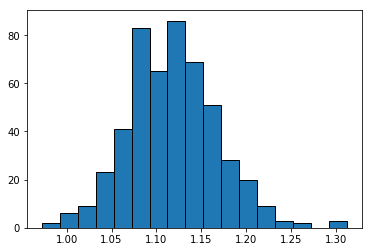

In [84]:
plt.hist(xwsigma['XSIGMA'], bins = 17, edgecolor='k')
np.mean(xwsigma['XSIGMA'])

"""Why is the mean calculated here different from the ql output?"""

1.8729113064934775

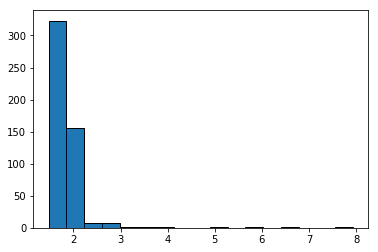

In [85]:
plt.hist(xwsigma['WSIGMA'], bins=17, edgecolor='k')
np.mean(xwsigma['WSIGMA'])
"""Why is the mean calculated here different from the ql output?"""

###  =================

<a id="step2" style="color:red">Step 2: EXTRACTION </a>     

[<= Back](#step1) [  (Back to Main)  ](#main)   [Next =>](#step3)

#### 2.1) Countbins

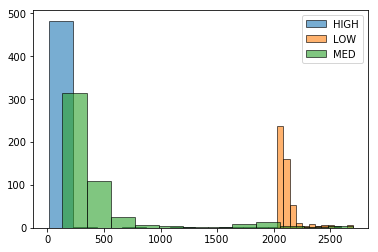

In [112]:
plt.hist( countbins['NBINSHIGH'], bins=12, edgecolor='k', alpha=0.6 , label='HIGH')
plt.hist( countbins['NBINSLOW'], bins=12, edgecolor='k', alpha=0.6, label='LOW')
plt.hist( countbins['NBINSMED'], bins=12, edgecolor='k', alpha=0.6, label='MED')
plt.legend(loc='best')


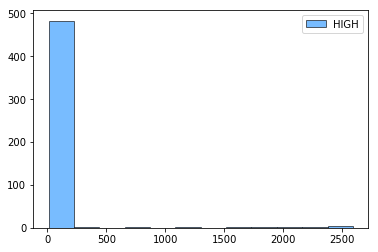

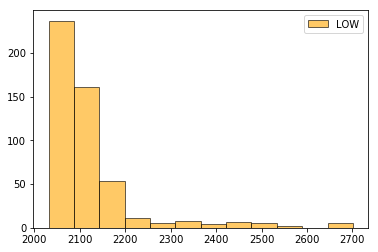

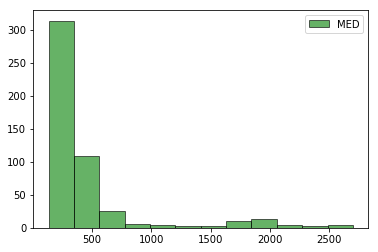

In [118]:
color = ['dodgerblue', 'orange','green' ]
for i, key in enumerate(['NBINSHIGH', 'NBINSLOW', 'NBINSMED']):
    plt.hist( countbins[key], bins=12, facecolor=color[i], edgecolor='k', alpha=0.6, label=key.replace('NBINS',""))
    plt.legend(loc='best')
    plt.show();    plt.close()



###  =================

<a id="step3" style="color:red">Step 3</a>    

[<= Back](#step2) [  (Back to Main)  ](#main) [Next =>](#step4)


#### 3.1) Integ

[743968.4704349267, 4188715.8533810945, 11156213.384535, 945928.1268592409, 1499682.111085032, 1401996.2717565733, 1037147.793211626, 7250166.330623063, 772673.1620965535]
[25, 168, 202, 250, 273, 294, 336, 413, 492]
[1804977.3933221402, 1014664.3047554797, 2343625.958015211, 1314340.1920512174]


(array([ 6.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([   743968.47043493,   1785192.96184493,   2826417.45325494,
          3867641.94466495,   4908866.43607496,   5950090.92748496,
          6991315.41889497,   8032539.91030498,   9073764.40171499,
         10114988.89312499,  11156213.384535  ]),
 <a list of 10 Patch objects>)

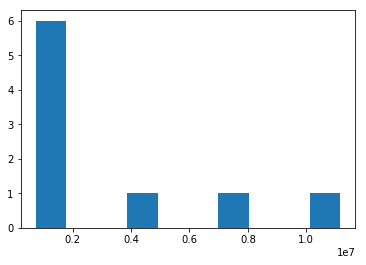

In [55]:
print integ['INTEG']
print integ['STD_FIBERID']
print integ['INTEG_AVG_AMP']

plt.hist(integ['INTEG'])

#### 3.2) skycount

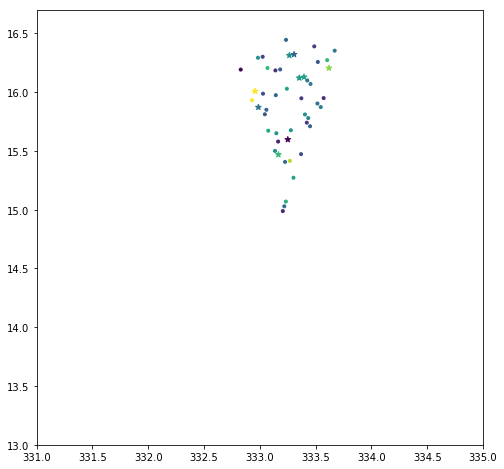

In [105]:
#float: SKYCONT 156.515486839
#List : DEC 5000
#List : RA 5000
#print skycont['SKYCONT_AMP']
#print skycont['SKYCONT_FIBER']
#print skycont['SKYFIBERID']
plt.figure(figsize=(8,8))
plt.xlim(331,335)
plt.ylim(13,16.7)
x = [ skycont['RA'][i]  for i in skycont['SKYFIBERID'] ]
y = [ skycont['DEC'][i] for i in skycont['SKYFIBERID'] ]

x2 = [ integ['RA'][i]  for i in integ['STD_FIBERID'] ]
y2 = [ integ['DEC'][i] for i in integ['STD_FIBERID'] ]

plt.scatter(x,y , c = skycont['SKYCONT_FIBER'], marker='.')
plt.scatter(x2,y2 , c =integ['STD_FIBERID'], marker='*') #integ['STD_FIBERID']

 


#### 3.3 Skypeak

#### 3.4) Skyresid)

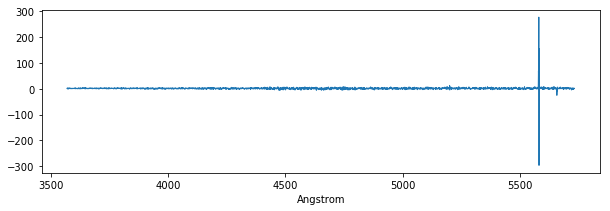

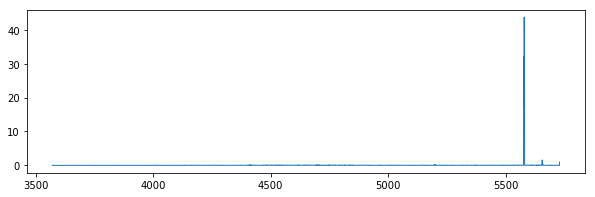

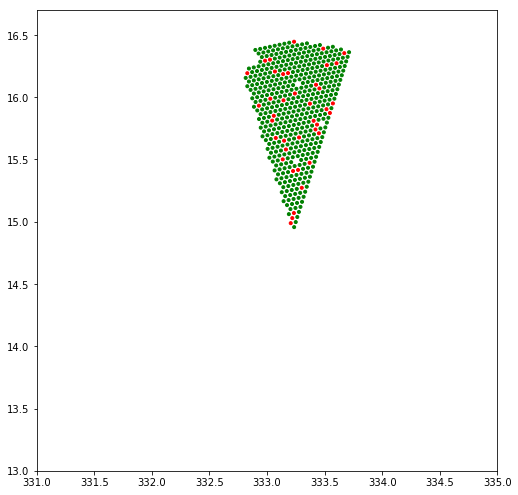

In [33]:
plt.figure(figsize=(10,3))
plt.plot(skyresid['WAVELENGTH'], skyresid['MED_RESID_WAVE'], linewidth =1)
plt.xlabel('Angstrom')
plt.show() ; plt.close()

plt.figure(figsize=(10,3))
plt.plot(skyresid['WAVELENGTH'], skyresid['WAVG_RES_WAVE'], linewidth =1)
ax.set_xlabel('Angstrom')
plt.show() ; plt.close()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1,0.1,0.8,0.8],polar=False)
ax.set_xlim(331,335)
ax.set_ylim(13,16.7)


bad = skyresid['SKY_FIBERID']
col, mark =[],[]
for x in range(500):
    if x in bad:
        col.append('red')
        mark.append('s')
    else:
        col.append('green')
        mark.append('.')

ax.scatter(skyresid['RA'], skyresid['DEC'], c= col, marker=".")
#ax.scatter(countbins['RA'], countbins['DEC'][bad], c=, marker=".")

plt.show(); plt.close()


<a id="step4"  style="color:red">Step 4 SKY SUBSTRACTION</a>     

[<= Back](#step3)  [  (Back to Main)  ](#main) 

#### 4.1) SNR

In [ ]:
#SAME AS IN THE LAST VERSION!